In [12]:
random_folders = [
    '../output/it.feio.android.omninotes.alpha/2025-04-20T01.56.35',
    '../output/it.feio.android.omninotes.alpha/2025-04-20T03.48.51',
    '../output/it.feio.android.omninotes.alpha/2025-04-20T05.44.00'
]

llm_folders = [
    '../output/it.feio.android.omninotes.alpha/2025-04-24T16.53.20',
    '../output/it.feio.android.omninotes.alpha/2025-04-24T19.25.05'
]

random_files = [f + '/coverage/coverage.csv' for f in random_folders]
llm_files = [f + '/coverage/coverage.csv' for f in llm_folders]

random_folders2 = [
    '../output/com.nononsenseapps.feeder.debug/2025-05-10T16.46.44',
    '../output/com.nononsenseapps.feeder.debug/2025-05-12T11.02.09',
    '../output/com.nononsenseapps.feeder.debug/2025-05-12T19.55.24'
]

llm_folders2 = [
    '../output/com.nononsenseapps.feeder.debug/2025-05-12T02.31.26',
    '../output/com.nononsenseapps.feeder.debug/2025-05-12T04.39.19',
    '../output/com.nononsenseapps.feeder.debug/2025-05-12T06.36.06'
]

random_files2 = [f + '/coverage/coverage.csv' for f in random_folders2]
llm_files2 = [f + '/coverage/coverage.csv' for f in llm_folders2]

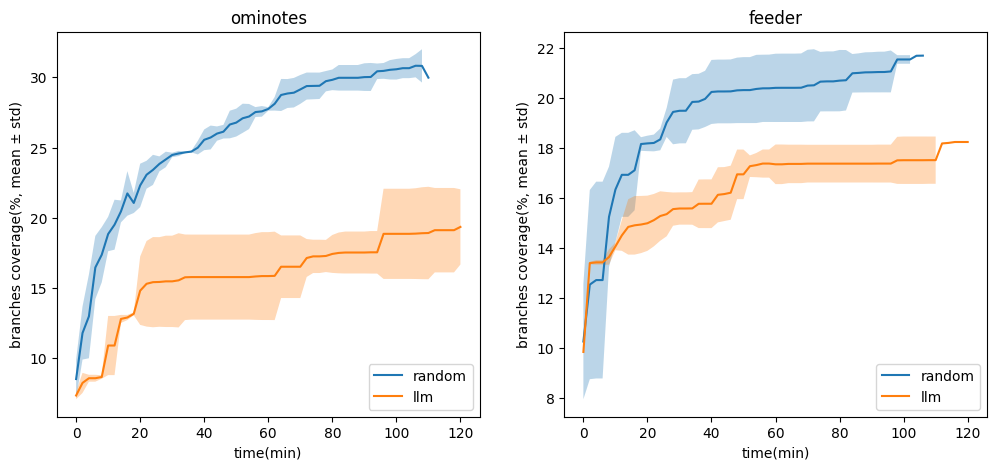

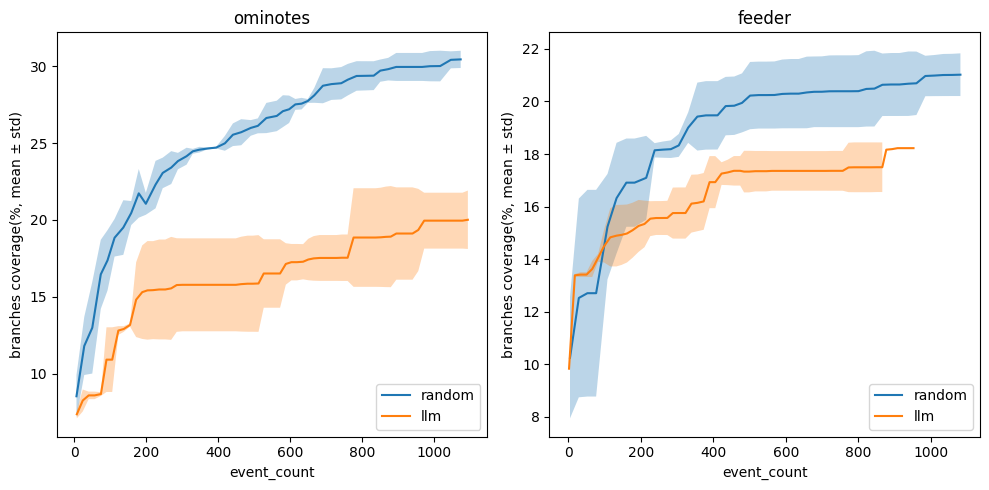

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fig_time, axs_time = plt.subplots(1, 2, figsize=(12, 5))
fig_event, axs_event = plt.subplots(1, 2, figsize=(10, 5))


def draw(files: list[str], name: str, i: int, app_name: str):
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

    df_grouped = df.groupby('index').agg({
        'instructions': ['mean', 'std'],
        'branches': ['mean', 'std'],
        'cxty': ['mean', 'std'],
        'lines': ['mean', 'std'],
        'methods': ['mean', 'std'],
        'classes': ['mean', 'std'],
        'event_count': 'mean'
    }).reset_index()

    df_grouped.columns = ['index'] + [f'{col}_{stat}' for col in ['instructions', 'branches',
                                                                  'cxty', 'lines', 'methods', 'classes'] for stat in ['mean', 'std']] + ['event_count']

    data = df_grouped[df_grouped['index'] <= 60]

    cols = ['branches']

    for _, col in enumerate(cols):
        ax = axs_time[i]
        y = data[f'{col}_mean']
        yerr = data[f'{col}_std']
        x = data['index']
        ax.plot(x * 2, y, label=name)
        ax.fill_between(x * 2, y - yerr, y + yerr, alpha=0.3)
        ax.set_title(app_name)
        ax.set_xlabel('time(min)')
        ax.set_ylabel(f'{col} coverage(%, mean ± std)')
        ax.legend(loc='lower right')

    data = df_grouped[df_grouped['event_count'] <= 1100]
    data = data.sort_values(by='event_count')

    for _, col in enumerate(cols):
        ax = axs_event[i]
        y = data[f'{col}_mean']
        yerr = data[f'{col}_std']
        x = data['event_count']
        ax.plot(x, y, label=name)
        ax.fill_between(x, y - yerr, y + yerr, alpha=0.3)
        ax.set_title(app_name)
        ax.set_xlabel('event_count')
        ax.set_ylabel(f'{col} coverage(%, mean ± std)')
        ax.legend(loc='lower right')

    plt.tight_layout()


draw(random_files, 'random', 0, 'ominotes')
draw(llm_files, 'llm', 0, 'ominotes')

draw(random_files2, 'random', 1, 'feeder')
draw(llm_files2, 'llm', 1, 'feeder')

plt.show()

In [14]:
import os

save_dir = f'output/llm_random'

os.makedirs(save_dir, exist_ok=True)

fig_time.savefig(f'{save_dir}/coverage_time.png')
fig_event.savefig(f'{save_dir}/coverage_event.png')

fig_time.savefig(f'{save_dir}/coverage_time.pdf', bbox_inches='tight')
fig_event.savefig(f'{save_dir}/coverage_event.pdf', bbox_inches='tight')